# BLIP: Inference Demo
 - [Image Captioning](#Image-Captioning)
 - [VQA](#VQA)
 - [Feature Extraction](#Feature-Extraction)
 - [Image Text Matching](#Image-Text-Matching)

In [13]:
# install requirements
import sys
if 'google.colab' in sys.modules:
    print('Running in Colab.')
    !pip3 install transformers==4.15.0 timm==0.4.12 fairscale==0.4.4
    !git clone https://github.com/salesforce/BLIP
    %cd BLIP

In [2]:
# 在终端pip install timm fairscale

In [3]:
%cd BLIP

d:\python11\day52\chapter_9-15章\BLIP


In [4]:
from PIL import Image
import requests
import torch
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def load_demo_image(image_size,device):
    # img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'
    raw_image = Image.open('demo.jpg').convert('RGB')
    w,h = raw_image.size
    display(raw_image.resize((w//5,h//5)))

    transform = transforms.Compose([
        transforms.Resize((image_size,image_size),interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
        ])
    image = transform(raw_image).unsqueeze(0).to(device)
    return image

In [5]:
!pip list

Package                   Version
------------------------- --------------
absl-py                   2.3.0
annotated-types           0.7.0
anyio                     4.9.0
argon2-cffi               25.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
astunparse                1.6.3
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
certifi                   2025.4.26
cffi                      1.17.1
charset-normalizer        3.4.2
click                     8.2.1
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.2
cycler                    0.12.1
debugpy                   1.8.14
decorator                 5.2.1
defusedxml                0.7.1
distro                    1.9.0
et_xmlfile                2.0.0
executing                 2.2.0
faiss-cpu                 1.11.0.post1
fastjsonsc


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Image Captioning
Perform image captioning using finetuned BLIP model

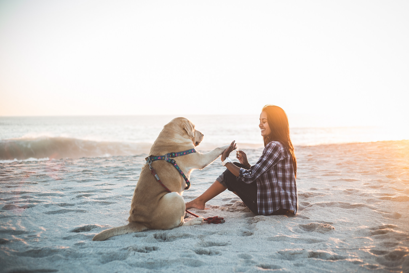

BertLMHeadModel has generative capabilities, as `prepare_inputs_for_generation` is explicitly defined. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


reshape position embedding from 196 to 576
load checkpoint from C:\Users\HDS\.cache\torch\hub\checkpoints\model_base.pth
BLIP_Decoder(
  (visual_encoder): VisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      (norm): Identity()
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (blocks): ModuleList(
      (0-11): 12 x Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (drop_path): Identity()
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU(approximate='none')
      

AttributeError: 'BertLMHeadModel' object has no attribute 'generate'

In [15]:
from models.blip import blip_decoder

image_size = 384
image = load_demo_image(image_size=image_size, device=device)

# 使用本地权重文件路径
model_path = r'C:\Users\HDS\.cache\torch\hub\checkpoints\model_base.pth'

model = blip_decoder(pretrained=model_path, image_size=image_size, vit='base')
print(model)
print('-'*100)
#计算模型参数量
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Number of parameters: %.2fM' % (num_params/1e6))
print('-'*100)
model.eval()
model = model.to(device)

with torch.no_grad():
    # beam search
    # caption = model.generate(image, sample=False, num_beams=3, max_length=20, min_length=5)
    # nucleus sampling
    caption = model.generate(image, sample=True, top_p=0.9, max_length=20, min_length=5)
    print('caption: '+caption[0])


# VQA
Perform visual question answering using finetuned BLIP model

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

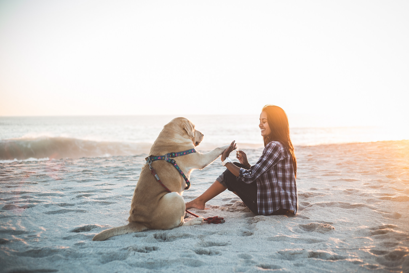

BlipForQuestionAnswering(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-05, e

In [7]:
# 如果上述方法都不行，建议使用Hugging Face的实现
from transformers import BlipProcessor, BlipForQuestionAnswering
from PIL import Image
import torch

# 使用Hugging Face的BLIP实现
processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

# 加载图像
image = load_demo_image(image_size=384, device=device)

# 如果image是tensor，需要转换为PIL Image
if isinstance(image, torch.Tensor):
    # 修复维度不匹配问题：检查张量维度并正确处理
    if image.dim() == 4:  # 如果是[B, C, H, W]格式
        # 去掉批次维度
        image = image.squeeze(0)
    # 现在应该是[C, H, W]格式
    image_pil = Image.fromarray((image.permute(1, 2, 0).cpu().numpy() * 255).astype('uint8'))
else:
    image_pil = image

question = "where is the woman sitting?"

# 处理输入
inputs = processor(image_pil, question, return_tensors="pt").to(device)
model = model.to(device)
print(model)
# 生成答案
with torch.no_grad():
    out = model.generate(**inputs, max_length=50)
    answer = processor.decode(out[0], skip_special_tokens=True)
    print('answer:', answer)

# vision_model是ViT

In [ ]:
# BlipForQuestionAnswering(
#   (vision_model): BlipVisionModel(
#     (embeddings): BlipVisionEmbeddings(
#       (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
#     )
#     (encoder): BlipEncoder(
#       (layers): ModuleList(
#         (0-11): 12 x BlipEncoderLayer(
#           (self_attn): BlipAttention(
#             (dropout): Dropout(p=0.0, inplace=False)
#             (qkv): Linear(in_features=768, out_features=2304, bias=True)
#             (projection): Linear(in_features=768, out_features=768, bias=True)
#           )
#           (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
#           (mlp): BlipMLP(
#             (activation_fn): GELUActivation()
#             (fc1): Linear(in_features=768, out_features=3072, bias=True)
#             (fc2): Linear(in_features=3072, out_features=768, bias=True)
#           )
#           (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
#         )
#       )
#     )
#     (post_layernorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
#   )
#   (text_encoder): BlipTextModel(
#     (embeddings): BlipTextEmbeddings(
#       (word_embeddings): Embedding(30524, 768, padding_idx=0)
#       (position_embeddings): Embedding(512, 768)
#       (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
#       (dropout): Dropout(p=0.0, inplace=False)
#     )
#     (encoder): BlipTextEncoder(
#       (layer): ModuleList(
#         (0-11): 12 x BlipTextLayer(
#           (attention): BlipTextAttention(
#             (self): BlipTextSelfAttention(
#               (query): Linear(in_features=768, out_features=768, bias=True)
#               (key): Linear(in_features=768, out_features=768, bias=True)
#               (value): Linear(in_features=768, out_features=768, bias=True)
#               (dropout): Dropout(p=0.0, inplace=False)
#             )
#             (output): BlipTextSelfOutput(
#               (dense): Linear(in_features=768, out_features=768, bias=True)
#               (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
#               (dropout): Dropout(p=0.0, inplace=False)
#             )
#           )
#           (crossattention): BlipTextAttention(
#             (self): BlipTextSelfAttention(
#               (query): Linear(in_features=768, out_features=768, bias=True)
#               (key): Linear(in_features=768, out_features=768, bias=True)
#               (value): Linear(in_features=768, out_features=768, bias=True)
#               (dropout): Dropout(p=0.0, inplace=False)
#             )
#             (output): BlipTextSelfOutput(
#               (dense): Linear(in_features=768, out_features=768, bias=True)
#               (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
#               (dropout): Dropout(p=0.0, inplace=False)
#             )
#           )
#           (intermediate): BlipTextIntermediate(
#             (dense): Linear(in_features=768, out_features=3072, bias=True)
#             (intermediate_act_fn): GELUActivation()
#           )
#           (output): BlipTextOutput(
#             (dense): Linear(in_features=3072, out_features=768, bias=True)
#             (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
#             (dropout): Dropout(p=0.0, inplace=False)
#           )
#         )
#       )
#     )
#   )
#   (text_decoder): BlipTextLMHeadModel(
#     (bert): BlipTextModel(
#       (embeddings): BlipTextEmbeddings(
#         (word_embeddings): Embedding(30524, 768, padding_idx=0)
#         (position_embeddings): Embedding(512, 768)
#         (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
#         (dropout): Dropout(p=0.0, inplace=False)
#       )
#       (encoder): BlipTextEncoder(
#         (layer): ModuleList(
#           (0-11): 12 x BlipTextLayer(
#             (attention): BlipTextAttention(
#               (self): BlipTextSelfAttention(
#                 (query): Linear(in_features=768, out_features=768, bias=True)
#                 (key): Linear(in_features=768, out_features=768, bias=True)
#                 (value): Linear(in_features=768, out_features=768, bias=True)
#                 (dropout): Dropout(p=0.0, inplace=False)
#               )
#               (output): BlipTextSelfOutput(
#                 (dense): Linear(in_features=768, out_features=768, bias=True)
#                 (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
#                 (dropout): Dropout(p=0.0, inplace=False)
#               )
#             )
#             (crossattention): BlipTextAttention(
#               (self): BlipTextSelfAttention(
#                 (query): Linear(in_features=768, out_features=768, bias=True)
#                 (key): Linear(in_features=768, out_features=768, bias=True)
#                 (value): Linear(in_features=768, out_features=768, bias=True)
#                 (dropout): Dropout(p=0.0, inplace=False)
#               )
#               (output): BlipTextSelfOutput(
#                 (dense): Linear(in_features=768, out_features=768, bias=True)
#                 (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
#                 (dropout): Dropout(p=0.0, inplace=False)
#               )
#             )
#             (intermediate): BlipTextIntermediate(
#               (dense): Linear(in_features=768, out_features=3072, bias=True)
#               (intermediate_act_fn): GELUActivation()
#             )
#             (output): BlipTextOutput(
#               (dense): Linear(in_features=3072, out_features=768, bias=True)
#               (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
#               (dropout): Dropout(p=0.0, inplace=False)
#             )
#           )
#         )
#       )
#     )
#     (cls): BlipTextOnlyMLMHead(
#       (predictions): BlipTextLMPredictionHead(
#         (transform): BlipTextPredictionHeadTransform(
#           (dense): Linear(in_features=768, out_features=768, bias=True)
#           (transform_act_fn): GELUActivation()
#           (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
#         )
#         (decoder): Linear(in_features=768, out_features=30524, bias=True)
#       )
#     )
#   )
# )

# Feature Extraction

# 三个向量分别是图像中的最后输出

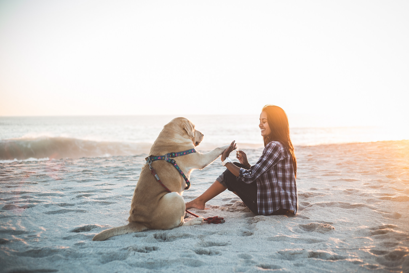

100%|██████████| 1.97G/1.97G [05:10<00:00, 6.81MB/s]


load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base.pth
BLIP_Base(
  (visual_encoder): VisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      (norm): Identity()
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (blocks): ModuleList(
      (0-11): 12 x Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (drop_path): Identity()
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU(approximate='none')
          (fc2): Linea

In [ ]:
from models.blip import blip_feature_extractor

image_size = 224
image = load_demo_image(image_size=image_size, device=device)
#model_base.pth是预训练模型，vit='base'表示使用base版本的ViT模型
model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base.pth'

model = blip_feature_extractor(pretrained=model_url, image_size=image_size, vit='base')
print(model)
print('-'*100)
#计算模型参数量
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Number of parameters: %.2fM' % (num_params/1e6))
print('-'*100)
model.eval()
model = model.to(device)

caption = 'a woman sitting on the beach with a dog'

multimodal_feature = model(image, caption, mode='multimodal')[0,0]
image_feature = model(image, caption, mode='image')[0,0]
text_feature = model(image, caption, mode='text')[0,0]
print('multimodal feature shape: %s' %str(multimodal_feature.shape)) 
print('image feature shape: %s' %str(image_feature.shape))
print('text feature shape: %s' %str(text_feature.shape))

In [ ]:
# BLIP_Base(
#   (visual_encoder): VisionTransformer(
#     (patch_embed): PatchEmbed(
#       (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
#       (norm): Identity()
#     )
#     (pos_drop): Dropout(p=0.0, inplace=False)
#     (blocks): ModuleList(
#       (0-11): 12 x Block(
#         (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
#         (attn): Attention(
#           (qkv): Linear(in_features=768, out_features=2304, bias=True)
#           (attn_drop): Dropout(p=0.0, inplace=False)
#           (proj): Linear(in_features=768, out_features=768, bias=True)
#           (proj_drop): Dropout(p=0.0, inplace=False)
#         )
#         (drop_path): Identity()
#         (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
#         (mlp): Mlp(
#           (fc1): Linear(in_features=768, out_features=3072, bias=True)
#           (act): GELU(approximate='none')
#           (fc2): Linear(in_features=3072, out_features=768, bias=True)
#           (drop): Dropout(p=0.0, inplace=False)
#         )
#       )
#     )
#     (norm): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
#   )
#   (text_encoder): BertModel(
#     (embeddings): BertEmbeddings(
#       (word_embeddings): Embedding(30524, 768, padding_idx=0)
#       (position_embeddings): Embedding(512, 768)
#       (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
#       (dropout): Dropout(p=0.1, inplace=False)
#     )
#     (encoder): BertEncoder(
#       (layer): ModuleList(
#         (0-11): 12 x BertLayer(
#           (attention): BertAttention(
#             (self): BertSelfAttention(
#               (query): Linear(in_features=768, out_features=768, bias=True)
#               (key): Linear(in_features=768, out_features=768, bias=True)
#               (value): Linear(in_features=768, out_features=768, bias=True)
#               (dropout): Dropout(p=0.1, inplace=False)
#             )
#             (output): BertSelfOutput(
#               (dense): Linear(in_features=768, out_features=768, bias=True)
#               (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
#               (dropout): Dropout(p=0.1, inplace=False)
#             )
#           )
#           (crossattention): BertAttention(
#             (self): BertSelfAttention(
#               (query): Linear(in_features=768, out_features=768, bias=True)
#               (key): Linear(in_features=768, out_features=768, bias=True)
#               (value): Linear(in_features=768, out_features=768, bias=True)
#               (dropout): Dropout(p=0.1, inplace=False)
#             )
#             (output): BertSelfOutput(
#               (dense): Linear(in_features=768, out_features=768, bias=True)
#               (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
#               (dropout): Dropout(p=0.1, inplace=False)
#             )
#           )
#           (intermediate): BertIntermediate(
#             (dense): Linear(in_features=768, out_features=3072, bias=True)
#             (intermediate_act_fn): GELUActivation()
#           )
#           (output): BertOutput(
#             (dense): Linear(in_features=3072, out_features=768, bias=True)
#             (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
#             (dropout): Dropout(p=0.1, inplace=False)
#           )
#         )
#       )
#     )
#   )
# )

# Image-Text Matching

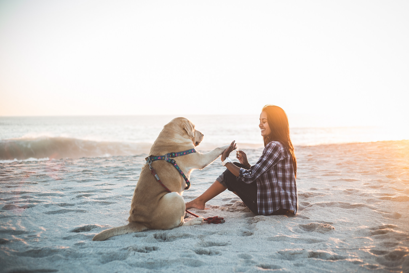

100%|██████████| 1.78G/1.78G [04:06<00:00, 7.74MB/s]


load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_retrieval_coco.pth
BLIP_ITM(
  (visual_encoder): VisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      (norm): Identity()
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (blocks): ModuleList(
      (0-11): 12 x Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (drop_path): Identity()
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU(approximate='none')
        

In [12]:
from models.blip_itm import blip_itm

image_size = 384
image = load_demo_image(image_size=image_size,device=device)
#model_base_retrieval_coco.pth是在coco数据集上训练的模型，retrieval是指检索任务,给定一张图片和一段文本，判断图片和文本是否匹配
model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_retrieval_coco.pth'

model = blip_itm(pretrained=model_url, image_size=image_size, vit='base')
print(model)
print('-'*100)
#计算模型参数量
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Number of parameters: %.2fM' % (num_params/1e6))
print('-'*100)
model.eval()
model = model.to(device='cpu')
caption = 'a woman sitting on the beach with a dog'

print('text: %s' %caption)

itm_output = model(image,caption,match_head='itm')
print(itm_output.shape)
itm_score = torch.nn.functional.softmax(itm_output,dim=1)[:,1]
print('The image and text is matched with a probability of %.4f'%itm_score)

itc_score = model(image,caption,match_head='itc')
print('The image feature and text feature has a cosine similarity of %.4f'%itc_score)

In [ ]:
# BLIP_ITM(
#   (visual_encoder): VisionTransformer(
#     (patch_embed): PatchEmbed(
#       (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
#       (norm): Identity()
#     )
#     (pos_drop): Dropout(p=0.0, inplace=False)
#     (blocks): ModuleList(
#       (0-11): 12 x Block(
#         (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
#         (attn): Attention(
#           (qkv): Linear(in_features=768, out_features=2304, bias=True)
#           (attn_drop): Dropout(p=0.0, inplace=False)
#           (proj): Linear(in_features=768, out_features=768, bias=True)
#           (proj_drop): Dropout(p=0.0, inplace=False)
#         )
#         (drop_path): Identity()
#         (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
#         (mlp): Mlp(
#           (fc1): Linear(in_features=768, out_features=3072, bias=True)
#           (act): GELU(approximate='none')
#           (fc2): Linear(in_features=3072, out_features=768, bias=True)
#           (drop): Dropout(p=0.0, inplace=False)
#         )
#       )
#     )
#     (norm): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
#   )
#   (text_encoder): BertModel(
#     (embeddings): BertEmbeddings(
#       (word_embeddings): Embedding(30524, 768, padding_idx=0)
#       (position_embeddings): Embedding(512, 768)
#       (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
#       (dropout): Dropout(p=0.1, inplace=False)
#     )
#     (encoder): BertEncoder(
#       (layer): ModuleList(
#         (0-11): 12 x BertLayer(
#           (attention): BertAttention(
#             (self): BertSelfAttention(
#               (query): Linear(in_features=768, out_features=768, bias=True)
#               (key): Linear(in_features=768, out_features=768, bias=True)
#               (value): Linear(in_features=768, out_features=768, bias=True)
#               (dropout): Dropout(p=0.1, inplace=False)
#             )
#             (output): BertSelfOutput(
#               (dense): Linear(in_features=768, out_features=768, bias=True)
#               (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
#               (dropout): Dropout(p=0.1, inplace=False)
#             )
#           )
#           (crossattention): BertAttention(
#             (self): BertSelfAttention(
#               (query): Linear(in_features=768, out_features=768, bias=True)
#               (key): Linear(in_features=768, out_features=768, bias=True)
#               (value): Linear(in_features=768, out_features=768, bias=True)
#               (dropout): Dropout(p=0.1, inplace=False)
#             )
#             (output): BertSelfOutput(
#               (dense): Linear(in_features=768, out_features=768, bias=True)
#               (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
#               (dropout): Dropout(p=0.1, inplace=False)
#             )
#           )
#           (intermediate): BertIntermediate(
#             (dense): Linear(in_features=768, out_features=3072, bias=True)
#             (intermediate_act_fn): GELUActivation()
#           )
#           (output): BertOutput(
#             (dense): Linear(in_features=3072, out_features=768, bias=True)
#             (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
#             (dropout): Dropout(p=0.1, inplace=False)
#           )
#         )
#       )
#     )
#   )
#   (vision_proj): Linear(in_features=768, out_features=256, bias=True)
#   (text_proj): Linear(in_features=768, out_features=256, bias=True)
#   (itm_head): Linear(in_features=768, out_features=2, bias=True)
# )